In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
#importing the data
data_train=pd.read_csv("train.csv")
data_train.head()

vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

  category  
0        F  
1        D  
2        C  
3        H  
4        D

In [3]:
#looking at the shape of data
data_train.shape

(14999, 9)

In [4]:
#changing the category from alphabets ranking to numerical ranking
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)

In [5]:
data_train.head()

vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

   category  
0         6  
1         4  
2         3  
3         8  
4         4

In [6]:
#removing 'F' present in the data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [7]:
data_train.shape

(14637, 9)

In [8]:
data_train.head()

vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

   category  
0         6  
1         4  
2         3  
3         8  
4         4

In [9]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category      int64
dtype: object

In [10]:
# changing the data types from object to int type
#data_train[['views', 'likes', 'dislikes', 'comment']] = data_train[['views', 'likes', 'dislikes', 'comment']].apply(pd.to_numeric)

In [11]:
data_train['views']=pd.to_numeric(data_train['views'])
data_train['likes']=pd.to_numeric(data_train['likes'])
data_train['dislikes']=pd.to_numeric(data_train['dislikes'])
data_train['comment']=pd.to_numeric(data_train['comment'])

In [12]:
data_train.describe(include='all')

vidid        adview         views          likes      dislikes  \
count       14637  1.463700e+04  1.463700e+04   14637.000000  14637.000000   
unique      14637           NaN           NaN            NaN           NaN   
top     VID_18655           NaN           NaN            NaN           NaN   
freq            1           NaN           NaN            NaN           NaN   
mean          NaN  2.066030e+03  7.112280e+05    2785.841293    254.429391   
std           NaN  5.282706e+04  2.731475e+06    8938.490736   1029.774864   
min           NaN  1.000000e+00  4.900000e+01       0.000000      0.000000   
25%           NaN  1.000000e+00  3.151700e+04      88.000000      7.000000   
50%           NaN  2.000000e+00  1.586680e+05     450.000000     38.000000   
75%           NaN  6.000000e+00  5.836130e+05    1863.000000    167.000000   
max           NaN  5.429665e+06  1.380479e+08  283824.000000  49449.000000   

             comment   published duration      category  
count   14637.000000       14637    14637  14637.000000  
unique           NaN        2384     3078           NaN  
top              NaN  2016-08-26    PT31S           NaN  
freq             NaN          40      133           NaN  
mean      409.135547         NaN      NaN      4.607228  
std      1511.176934         NaN      NaN      1.576312  
min         0.000000         NaN      NaN      1.000000  
25%         7.000000         NaN      NaN      4.000000  
50%        46.000000         NaN      NaN      4.000000  
75%       224.000000         NaN      NaN      6.000000  
max     75045.000000         NaN      NaN      8.000000

In [13]:
column_vidid=data_train['vidid']

In [14]:
#Encoding features like Category, duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [15]:
data_train.head()

vidid  adview    views  likes  dislikes  comment  published  duration  \
0   5912      40  1031602   8523       363     1095       2168      2925   
1   2741       2     1707     56         2        6       2185      3040   
2   8138       1     2023     25         0        2       2094      1863   
3   9005       6   620860    777       161      153       2119      2546   
4    122       1      666      1         0        0       2091      1963   

   category  
0         6  
1         4  
2         3  
3         8  
4         4

PT7M37S

In [16]:
#Convert Time_in_Sec for duration
import datetime
import time

def checki(x):
    y=x[2:]
    h='0'
    m='0'
    s='0'
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        elif(i=="H"):
            h=mm
            mm=''
        elif(i=="M"):
            m=mm
            mm=''
        else:
            s=mm
            mm=''
    bp=h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp=pd.read_csv("train.csv")["duration"]
time=mp.apply(checki)

def func_sec(time_string):
    h,m,s=time_string.split(':')
    return int(h)*3600+int(m)*60+int(s)

time1=time.apply(func_sec)


In [17]:
#Replacing the newly generated time value in sec in duration column
data_train["duration"]=time1
data_train

vidid  adview    views  likes  dislikes  comment  published  duration  \
0       5912      40  1031602   8523       363     1095       2168       457   
1       2741       2     1707     56         2        6       2185       570   
2       8138       1     2023     25         0        2       2094       136   
3       9005       6   620860    777       161      153       2119       262   
4        122       1      666      1         0        0       2091        31   
...      ...     ...      ...    ...       ...      ...        ...       ...   
14994   9869       2   525949   1137        83       86       1683       370   
14995  11758       1   665673   3849       156      569       1838       236   
14996  13263       4     3479     16         1        1       1053       193   
14997   6736       1      963      0         0        0        222        26   
14998  13592       1    15212     22         5        4       1960        61   

       category  
0             6  
1             4  
2             3  
3             8  
4             4  
...         ...  
14994         1  
14995         4  
14996         2  
14997         7  
14998         4  

[14637 rows x 9 columns]

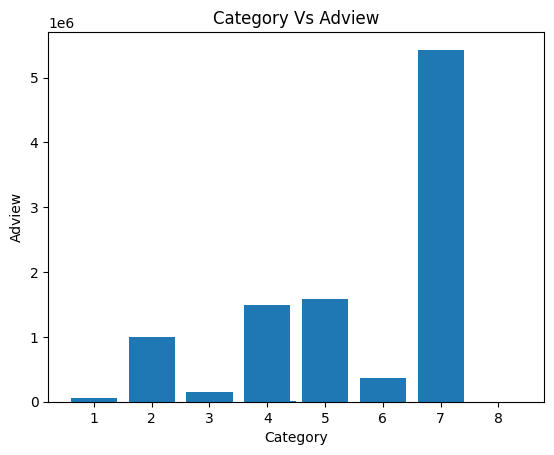

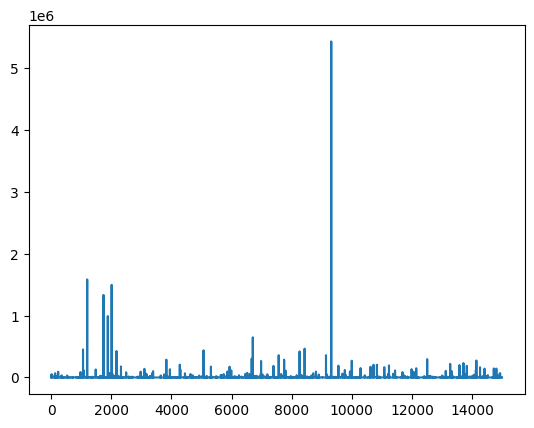

In [18]:
# visualization
    # Individual Plots
plt.hist(data_train["category"])
plt.show
plt.bar(data_train["category"],data_train["adview"])
plt.title("Category Vs Adview")
plt.xlabel('Category')
plt.ylabel('Adview')
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [19]:
#Remove videos with adview greater than 2000000 as outlier
data_train  = data_train[data_train["adview"]<2000000]

In [20]:
#heatmap
import seaborn as sns

C:\Users\shp50c\AppData\Local\Temp\ipykernel_5956\3166796815.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


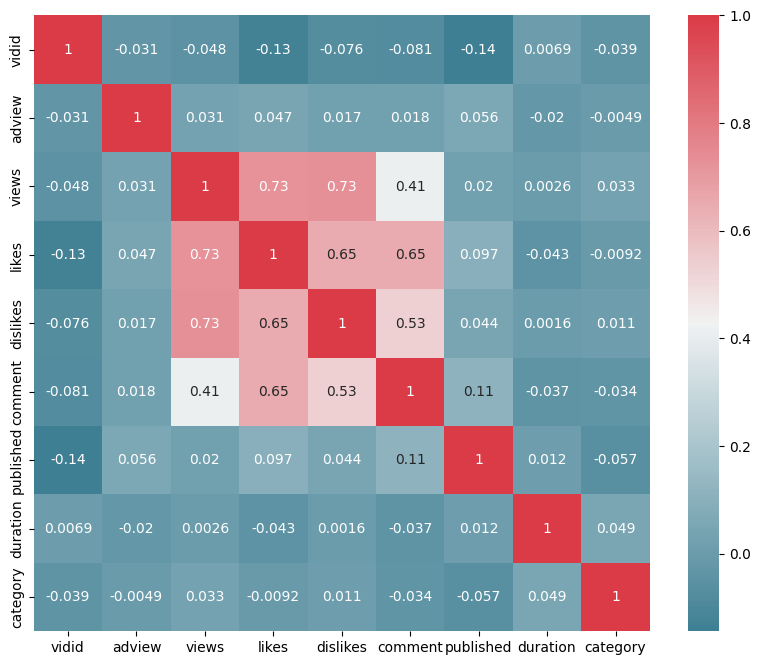

In [21]:
f,ax =plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [22]:
#split the data into training and testing datasets
Y_train=pd.DataFrame(data=data_train.iloc[:,1].values,columns=['target'])

In [23]:
data_train=data_train.drop(["vidid"],axis=1)
data_train=data_train.drop(["adview"],axis=1)
data_train.head()

views  likes  dislikes  comment  published  duration  category
0  1031602   8523       363     1095       2168       457         6
1     1707     56         2        6       2185       570         4
2     2023     25         0        2       2094       136         3
3   620860    777       161      153       2119       262         8
4      666      1         0        0       2091        31         4

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(11708, 7)

In [26]:
#Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [27]:
#Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test,prediction))
    print("Mean Absolute Error:", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [28]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210337
Mean Absolute Error: 28907.83857573986


In [29]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

c:\users\shp50c\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Mean Absolute Error: 28873.617300732723


In [30]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test,decision_tree)

Mean Absolute Error: 2593.97575136612
Mean Squared Error: 879823236.9176912
Mean Absolute Error: 29661.814457610162


In [31]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimator = 200
max_depth = 25
min_samples_split = 15
min_sample_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimator, max_depth = max_depth,
                                      min_samples_split = min_samples_split, min_samples_leaf = min_sample_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

c:\users\shp50c\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 3342.9503716326108
Mean Squared Error: 701902787.4258697
Mean Absolute Error: 26493.448009382806


In [32]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),
                               Dense(6,activation="relu"),Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 4s 6ms/step - loss: 767404480.0000 - mean_squared_error: 767404480.0000
Epoch 2/100
366/366 [==============================] - 2s 6ms/step - loss: 767396800.0000 - mean_squared_error: 767396800.0000
Epoch 3/100
366/366 [==============================] - 2s 6ms/step - loss: 767380736.0000 - mean_squared_error: 767380736.0000
Epoch 4/100
366/366 [==============================] - 3s 7ms/step - loss: 767352256.0000 - mean_squared_error: 767352256.0000
Epoch 5/100
366/366 [==============================] - 2s 6ms/step - loss: 767304192.0000 - mean_squared_error: 767304192.0000
Epoch 6/100
366/366 [==============================] - 2s 6ms/step - loss: 767238080.0000 - mean_squared_error: 767238080.0000
Epoch 7/100
366/366 [==============================] - 2s 7ms/step - loss: 767150912.0000 - mean_squared_error: 767150912.0000
Epoch 8/100
366/366 [==============================] - 5s 14ms/step - loss: 767041216.0000 - mean_squared_error

In [33]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

c:\users\shp50c\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
